<a href="https://colab.research.google.com/github/akroumakila/project/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam






In [ ]:
import os

path = os.listdir('/content/drive/MyDrive/data/DDSM')
classes = {'Malignant_Masses':0, 'Benign_Masses':1}

In [ ]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '/content/drive/MyDrive/data/DDSM/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (227,227))
        X.append(img)
        Y.append(classes[cls])

In [ ]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [ ]:
np.unique(Y)

array([0, 1])

In [ ]:
pd.Series(Y).value_counts()

0    7157
1    5969
dtype: int64

In [ ]:
X.shape, X_updated.shape

((13126, 227, 227), (13126, 51529))

In [ ]:
X.shape

(13126, 227, 227)

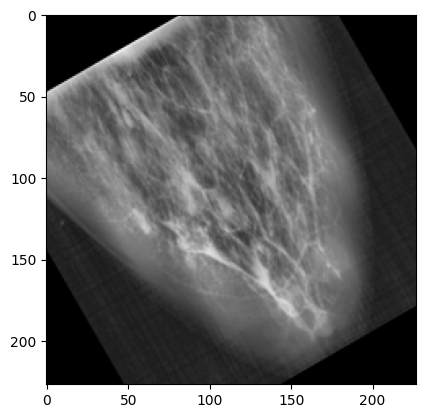

In [ ]:
plt.imshow(X[13125], cmap='gray')

In [ ]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(13126, 51529)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [ ]:
# check if the average is close to zero
print("the average : ", np.mean(xtrain, axis=0))
# check if the standard deviation is close to 1
print("deviation : ", np.std(xtrain, axis=0))
#check if the average is close to zero
print("the average : ", np.mean(xtest, axis=0))
# check if the standard deviation is close to 1
print("deviation : ", np.std(xtest, axis=0))

Moyenne :  [ 8.50134777e-16 -1.08577697e-15 -1.11017544e-15 ...  2.57265109e-16
  5.19901582e-17 -1.18016708e-16]
Écart-type :  [1. 1. 1. ... 1. 1. 1.]
Moyenne :  [-0.03274473 -0.03364247 -0.03133106 ... -0.03266561 -0.03214838
 -0.02932158]
Écart-type :  [0.97275567 0.96482121 0.96724521 ... 0.95589136 0.95470921 0.96290815]


In [ ]:
# Reshape the data for LSTM input
X_train = np.reshape(xtrain, (xtrain.shape[0], 1, xtrain.shape[1]))
X_test = np.reshape(xtest, (xtest.shape[0], 1, xtest.shape[1]))
X_train.shape

(10500, 1, 51529)

In [ ]:
X_train.shape

(10500, 1, 51529)

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             13208064  
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 13,241,153
Trainable params: 13,241,153
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Train the model
epochs=40
#history = model.fit(X_train, y_train, epochs=epochs, batch_size=32)
history = model.fit(X_train,ytrain, epochs=epochs, batch_size=32, validation_split=0.2)
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, ytest)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/40
263/263 [==============================] - 15s 24ms/step - loss: 0.4503 - accuracy: 0.7813 - val_loss: 0.1177 - val_accuracy: 0.9843
Epoch 2/40
263/263 [==============================] - 5s 19ms/step - loss: 0.2380 - accuracy: 0.9080 - val_loss: 0.0484 - val_accuracy: 0.9933
Epoch 3/40
263/263 [==============================] - 6s 22ms/step - loss: 0.1537 - accuracy: 0.9406 - val_loss: 0.0328 - val_accuracy: 0.9957
Epoch 4/40
263/263 [==============================] - 5s 19ms/step - loss: 0.1318 - accuracy: 0.9530 - val_loss: 0.0272 - val_accuracy: 0.9971
Epoch 5/40
263/263 [==============================] - 7s 25ms/step - loss: 0.1078 - accuracy: 0.9642 - val_loss: 0.0245 - val_accuracy: 0.9976
Epoch 6/40
263/263 [==============================] - 5s 19ms/step - loss: 0.0869 - accuracy: 0.9690 - val_loss: 0.0283 - val_accuracy: 0.9952
Epoch 7/40
263/263 [==============================] - 5s 18ms/step - loss: 0.0829 - accuracy: 0.9757 - val_loss: 0.0278 - val_accuracy: 0.995

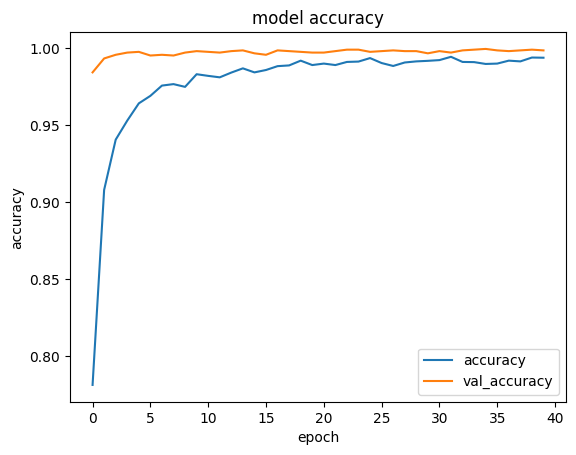

In [ ]:
plt.plot(history.history['accuracy'],label="accuracy")
plt.plot(history.history['val_accuracy'],label="val_accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()


plt.show()

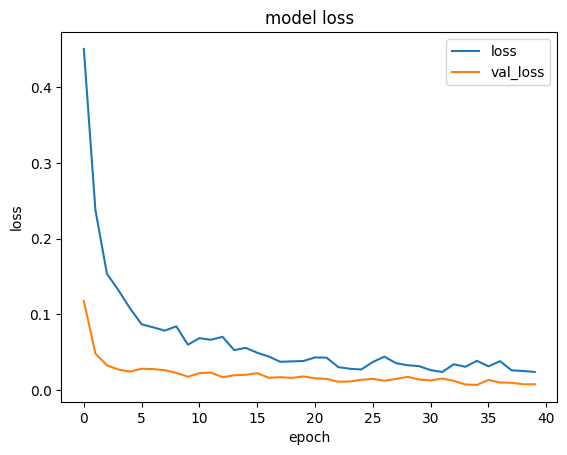

In [ ]:
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
X_test.shape


(2626, 1, 51529)

In [ ]:
model.save('/content/drive/MyDrive/model.h5')